In [1]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Connect to SQLite database

In [2]:
conn = sql.connect('adventure works new.db')

In [ ]:
# To execute SQL queries using Pandas

In [5]:
def run_query(query): return pd.read_sql_query(query,conn)

In [ ]:
# SQL query to get demographics

In [7]:
customer_query = """ SELECT CustomerKey, Age_Group, Gender, AnnualIncome, Occupation, HomeOwner, TotalChildren FROM AdventureWorks_Customers;"""
customers_df = run_query(customer_query)

In [ ]:
# display the first few rows

In [11]:
customers_df.head()

,CustomerKey,Age_Group,Gender,AnnualIncome,Occupation,HomeOwner,TotalChildren
0,11000,55-64,M,"$90,000",Professional,Y,2
1,11001,55-64,M,"$60,000",Professional,N,3
2,11002,55-64,M,"$60,000",Professional,Y,3
3,11003,55-64,F,"$70,000",Professional,N,0
4,11004,55-64,F,"$80,000",Professional,Y,5


In [ ]:
#SQL query to retreive sales data

In [41]:
sales_query = """
    SELECT 
    Sales.*, 
    Customers.*
    FROM
        AdventureWorks_Sales AS Sales
    JOIN
        AdventureWorks_Customers AS Customers
        On Sales.CustomerKey = Customers.CustomerKey;
"""
    
    

In [43]:
sales_df = run_query(sales_query)

In [45]:
sales_df.head()

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,Region,CustomerKey,...,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,Age,Age_Group
0,1/1/2015,9/21/2001,SO45080,332,14657,1,1,1,United States NorthWest,14657,...,M,M,john48@adventure-works.com,"$80,000",1,Partial College,Skilled Manual,N,65,65+
1,1/1/2015,12/5/2001,SO45079,312,29255,4,1,1,United States SouthWest,29255,...,S,M,kyle8@adventure-works.com,"$80,000",3,Partial College,Professional,N,69,65+
2,1/1/2015,10/29/2001,SO45082,350,11455,9,1,1,Australia,11455,...,M,M,ross38@adventure-works.com,"$100,000",0,High School,Management,Y,50,45-54
3,1/1/2015,11/16/2001,SO45081,338,26782,6,1,1,Canada,26782,...,S,M,seth20@adventure-works.com,"$30,000",0,High School,Skilled Manual,N,44,35-44
4,1/2/2015,12/15/2001,SO45083,312,14947,10,1,1,United Kingdom,14947,...,S,M,alejandro4@adventure-works.com,"$20,000",2,High School,Manual,Y,59,55-64


In [ ]:
# SQL query to drop duplicat columns

In [57]:
sales_df.loc[:, ~sales_df.columns.duplicated()]

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,Region,Prefix,...,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,Age,Age_Group
0,1/1/2015,9/21/2001,SO45080,332,14657,1,1,1,United States NorthWest,MR.,...,M,M,john48@adventure-works.com,"$80,000",1,Partial College,Skilled Manual,N,65,65+
1,1/1/2015,12/5/2001,SO45079,312,29255,4,1,1,United States SouthWest,MR.,...,S,M,kyle8@adventure-works.com,"$80,000",3,Partial College,Professional,N,69,65+
2,1/1/2015,10/29/2001,SO45082,350,11455,9,1,1,Australia,MR.,...,M,M,ross38@adventure-works.com,"$100,000",0,High School,Management,Y,50,45-54
3,1/1/2015,11/16/2001,SO45081,338,26782,6,1,1,Canada,MR.,...,S,M,seth20@adventure-works.com,"$30,000",0,High School,Skilled Manual,N,44,35-44
4,1/2/2015,12/15/2001,SO45083,312,14947,10,1,1,United Kingdom,MR.,...,S,M,alejandro4@adventure-works.com,"$20,000",2,High School,Manual,Y,59,55-64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56041,6/30/2017,3/22/2004,SO74143,477,28517,10,3,2,United Kingdom,MR.,...,S,M,troy20@adventure-works.com,"$20,000",0,Partial College,Manual,N,55,55-64
56042,6/30/2017,3/15/2004,SO74143,479,28517,10,2,1,United Kingdom,MR.,...,S,M,troy20@adventure-works.com,"$20,000",0,Partial College,Manual,N,55,55-64
56043,6/30/2017,4/8/2004,SO74143,606,28517,10,1,1,United Kingdom,MR.,...,S,M,troy20@adventure-works.com,"$20,000",0,Partial College,Manual,N,55,55-64
56044,6/30/2017,5/15/2004,SO74124,480,21676,7,2,2,France,MS.,...,S,F,valerie19@adventure-works.com,"$20,000",0,Partial High School,Manual,Y,53,45-54


In [ ]:
#SQL Query to join product and sales data

In [61]:
sales_query = """
    SELECT 
    Sales.*, 
    Products.*
    FROM
        AdventureWorks_Sales AS Sales
    JOIN
        AdventureWorks_Products AS Products
        On Sales.ProductKey = Products.ProductKey;
"""
    
    

In [64]:
sales_df = run_query(sales_query)

In [66]:
sales_df.head()

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,Region,ProductKey,ProductSubcategoryKey,ProductSKU,ProductName,ModelName,ProductDescription,ProductColor,ProductSize,ProductStyle,ProductCost,ProductPrice
0,1/1/2015,9/21/2001,SO45080,332,14657,1,1,1,United States NorthWest,332,2,BK-R50B-58,"Road-650 Black, 58",Road-650,Value-priced bike with many features of our to...,Black,58,U,413.1463,699.0982
1,1/1/2015,12/5/2001,SO45079,312,29255,4,1,1,United States SouthWest,312,2,BK-R93R-48,"Road-150 Red, 48",Road-150,This bike is ridden by race winners. Developed...,Red,48,U,2171.2942,3578.2700
2,1/1/2015,10/29/2001,SO45082,350,11455,9,1,1,Australia,350,1,BK-M82B-44,"Mountain-100 Black, 44",Mountain-100,Top-of-the-line competition mountain bike. Per...,Black,44,U,1898.0944,3374.9900
3,1/1/2015,11/16/2001,SO45081,338,26782,6,1,1,Canada,338,2,BK-R50B-44,"Road-650 Black, 44",Road-650,Value-priced bike with many features of our to...,Black,44,U,413.1463,699.0982
4,1/2/2015,12/15/2001,SO45083,312,14947,10,1,1,United Kingdom,312,2,BK-R93R-48,"Road-150 Red, 48",Road-150,This bike is ridden by race winners. Developed...,Red,48,U,2171.2942,3578.2700


In [ ]:
# merging customer dataframe to sales dataframe

In [68]:
merge_df = pd.merge( sales_df, customers_df, on = 'CustomerKey')

In [70]:
merge_df.head()

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,Region,ProductKey,...,ProductSize,ProductStyle,ProductCost,ProductPrice,Age_Group,Gender,AnnualIncome,Occupation,HomeOwner,TotalChildren
0,1/1/2015,9/21/2001,SO45080,332,14657,1,1,1,United States NorthWest,332,...,58,U,413.1463,699.0982,65+,M,"$80,000",Skilled Manual,N,1
1,1/1/2015,12/5/2001,SO45079,312,29255,4,1,1,United States SouthWest,312,...,48,U,2171.2942,3578.2700,65+,M,"$80,000",Professional,N,3
2,1/1/2015,10/29/2001,SO45082,350,11455,9,1,1,Australia,350,...,44,U,1898.0944,3374.9900,45-54,M,"$100,000",Management,Y,0
3,1/1/2015,11/16/2001,SO45081,338,26782,6,1,1,Canada,338,...,44,U,413.1463,699.0982,35-44,M,"$30,000",Skilled Manual,N,0
4,1/2/2015,12/15/2001,SO45083,312,14947,10,1,1,United Kingdom,312,...,48,U,2171.2942,3578.2700,55-64,M,"$20,000",Manual,Y,2


In [72]:
merge_df.loc[:, ~merge_df.columns.duplicated()]

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,Region,ProductSubcategoryKey,...,ProductSize,ProductStyle,ProductCost,ProductPrice,Age_Group,Gender,AnnualIncome,Occupation,HomeOwner,TotalChildren
0,1/1/2015,9/21/2001,SO45080,332,14657,1,1,1,United States NorthWest,2,...,58,U,413.1463,699.0982,65+,M,"$80,000",Skilled Manual,N,1
1,1/1/2015,12/5/2001,SO45079,312,29255,4,1,1,United States SouthWest,2,...,48,U,2171.2942,3578.2700,65+,M,"$80,000",Professional,N,3
2,1/1/2015,10/29/2001,SO45082,350,11455,9,1,1,Australia,1,...,44,U,1898.0944,3374.9900,45-54,M,"$100,000",Management,Y,0
3,1/1/2015,11/16/2001,SO45081,338,26782,6,1,1,Canada,2,...,44,U,413.1463,699.0982,35-44,M,"$30,000",Skilled Manual,N,0
4,1/2/2015,12/15/2001,SO45083,312,14947,10,1,1,United Kingdom,2,...,48,U,2171.2942,3578.2700,55-64,M,"$20,000",Manual,Y,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56041,6/30/2017,3/22/2004,SO74143,477,28517,10,3,2,United Kingdom,28,...,0,0,1.8663,4.9900,55-64,M,"$20,000",Manual,N,0
56042,6/30/2017,3/15/2004,SO74143,479,28517,10,2,1,United Kingdom,28,...,0,0,3.3623,8.9900,55-64,M,"$20,000",Manual,N,0
56043,6/30/2017,4/8/2004,SO74143,606,28517,10,1,1,United Kingdom,2,...,52,U,343.6496,539.9900,55-64,M,"$20,000",Manual,N,0
56044,6/30/2017,5/15/2004,SO74124,480,21676,7,2,2,France,37,...,0,0,0.8565,2.2900,45-54,F,"$20,000",Manual,Y,0


In [74]:
merge_df['OrderValue'] = merge_df['ProductPrice'] * merge_df['OrderQuantity']

In [76]:
print(merge_df)

       OrderDate   StockDate OrderNumber  ProductKey  CustomerKey  \
0       1/1/2015   9/21/2001     SO45080         332        14657   
1       1/1/2015   12/5/2001     SO45079         312        29255   
2       1/1/2015  10/29/2001     SO45082         350        11455   
3       1/1/2015  11/16/2001     SO45081         338        26782   
4       1/2/2015  12/15/2001     SO45083         312        14947   
...          ...         ...         ...         ...          ...   
56041  6/30/2017   3/22/2004     SO74143         477        28517   
56042  6/30/2017   3/15/2004     SO74143         479        28517   
56043  6/30/2017    4/8/2004     SO74143         606        28517   
56044  6/30/2017   5/15/2004     SO74124         480        21676   
56045  6/30/2017    5/4/2004     SO74124         538        21676   

       TerritoryKey  OrderLineItem  OrderQuantity                   Region  \
0                 1              1              1  United States NorthWest   
1              

In [78]:
merge_df.head()

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,Region,ProductKey,...,ProductStyle,ProductCost,ProductPrice,Age_Group,Gender,AnnualIncome,Occupation,HomeOwner,TotalChildren,OrderValue
0,1/1/2015,9/21/2001,SO45080,332,14657,1,1,1,United States NorthWest,332,...,U,413.1463,699.0982,65+,M,"$80,000",Skilled Manual,N,1,699.0982
1,1/1/2015,12/5/2001,SO45079,312,29255,4,1,1,United States SouthWest,312,...,U,2171.2942,3578.2700,65+,M,"$80,000",Professional,N,3,3578.2700
2,1/1/2015,10/29/2001,SO45082,350,11455,9,1,1,Australia,350,...,U,1898.0944,3374.9900,45-54,M,"$100,000",Management,Y,0,3374.9900
3,1/1/2015,11/16/2001,SO45081,338,26782,6,1,1,Canada,338,...,U,413.1463,699.0982,35-44,M,"$30,000",Skilled Manual,N,0,699.0982
4,1/2/2015,12/15/2001,SO45083,312,14947,10,1,1,United Kingdom,312,...,U,2171.2942,3578.2700,55-64,M,"$20,000",Manual,Y,2,3578.2700


In [ ]:
# Group by age group and calculate the average order

In [80]:
age_group_purchases = merge_df.groupby('Age_Group'). agg(
    avg_order_value= ('OrderValue', 'mean'),
    purchase_count= ('CustomerKey', 'count')
).reset_index()

In [ ]:
# dispaly the results

In [82]:
age_group_purchases

,Age_Group,avg_order_value,purchase_count
0,35-44,357.769323,891
1,45-54,443.724692,14657
2,55-64,473.799311,19341
3,65+,423.309069,21080


In [86]:
print(merge_df.head())
print(merge_df.dtypes)

  OrderDate   StockDate OrderNumber  ProductKey  CustomerKey  TerritoryKey  \
0  1/1/2015   9/21/2001     SO45080         332        14657             1   
1  1/1/2015   12/5/2001     SO45079         312        29255             4   
2  1/1/2015  10/29/2001     SO45082         350        11455             9   
3  1/1/2015  11/16/2001     SO45081         338        26782             6   
4  1/2/2015  12/15/2001     SO45083         312        14947            10   

   OrderLineItem  OrderQuantity                   Region  ProductKey  ...  \
0              1              1  United States NorthWest         332  ...   
1              1              1  United States SouthWest         312  ...   
2              1              1                Australia         350  ...   
3              1              1                   Canada         338  ...   
4              1              1           United Kingdom         312  ...   

   ProductStyle ProductCost ProductPrice Age_Group Gender AnnualInco

In [92]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56046 entries, 0 to 56045
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   OrderDate              56046 non-null  object 
 1   StockDate              56046 non-null  object 
 2   OrderNumber            56046 non-null  object 
 3   ProductKey             56046 non-null  int64  
 4   CustomerKey            56046 non-null  int64  
 5   TerritoryKey           56046 non-null  int64  
 6   OrderLineItem          56046 non-null  int64  
 7   OrderQuantity          56046 non-null  int64  
 8   Region                 56046 non-null  object 
 9   ProductKey             56046 non-null  int64  
 10  ProductSubcategoryKey  56046 non-null  int64  
 11  ProductSKU             56046 non-null  object 
 12  ProductName            56046 non-null  object 
 13  ModelName              56046 non-null  object 
 14  ProductDescription     56046 non-null  object 
 15  Pr

In [96]:
import numpy as np

In [98]:
merge_df['ProductKey'] = merge_df['ProductKey'].apply(lambda x: x[0] if isinstance(x, (list, np.ndarray)) else x)

In [ ]:
# dropping duplicate columns

In [112]:
merge_df.loc[:, ~merge_df.columns.duplicated()]

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,Region,ProductSubcategoryKey,...,ProductStyle,ProductCost,ProductPrice,Age_Group,Gender,AnnualIncome,Occupation,HomeOwner,TotalChildren,OrderValue
0,1/1/2015,9/21/2001,SO45080,332,14657,1,1,1,United States NorthWest,2,...,U,413.1463,699.0982,65+,M,"$80,000",Skilled Manual,N,1,699.0982
1,1/1/2015,12/5/2001,SO45079,312,29255,4,1,1,United States SouthWest,2,...,U,2171.2942,3578.2700,65+,M,"$80,000",Professional,N,3,3578.2700
2,1/1/2015,10/29/2001,SO45082,350,11455,9,1,1,Australia,1,...,U,1898.0944,3374.9900,45-54,M,"$100,000",Management,Y,0,3374.9900
3,1/1/2015,11/16/2001,SO45081,338,26782,6,1,1,Canada,2,...,U,413.1463,699.0982,35-44,M,"$30,000",Skilled Manual,N,0,699.0982
4,1/2/2015,12/15/2001,SO45083,312,14947,10,1,1,United Kingdom,2,...,U,2171.2942,3578.2700,55-64,M,"$20,000",Manual,Y,2,3578.2700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56041,6/30/2017,3/22/2004,SO74143,477,28517,10,3,2,United Kingdom,28,...,0,1.8663,4.9900,55-64,M,"$20,000",Manual,N,0,9.9800
56042,6/30/2017,3/15/2004,SO74143,479,28517,10,2,1,United Kingdom,28,...,0,3.3623,8.9900,55-64,M,"$20,000",Manual,N,0,8.9900
56043,6/30/2017,4/8/2004,SO74143,606,28517,10,1,1,United Kingdom,2,...,U,343.6496,539.9900,55-64,M,"$20,000",Manual,N,0,539.9900
56044,6/30/2017,5/15/2004,SO74124,480,21676,7,2,2,France,37,...,0,0.8565,2.2900,45-54,F,"$20,000",Manual,Y,0,4.5800


In [119]:
merge_df.columns

Index(['OrderDate', 'StockDate', 'OrderNumber', 'ProductKey', 'CustomerKey',
       'TerritoryKey', 'OrderLineItem', 'OrderQuantity', 'Region',
       'ProductKey', 'ProductSubcategoryKey', 'ProductSKU', 'ProductName',
       'ModelName', 'ProductDescription', 'ProductColor', 'ProductSize',
       'ProductStyle', 'ProductCost', 'ProductPrice', 'Age_Group', 'Gender',
       'AnnualIncome', 'Occupation', 'HomeOwner', 'TotalChildren',
       'OrderValue'],
      dtype='object')

In [121]:
merge_df = merge_df.loc[:, ~merge_df.columns.duplicated()]

In [125]:
print(merge_df.columns)
print(merge_df.shape)

Index(['OrderDate', 'StockDate', 'OrderNumber', 'ProductKey', 'CustomerKey',
       'TerritoryKey', 'OrderLineItem', 'OrderQuantity', 'Region',
       'ProductSubcategoryKey', 'ProductSKU', 'ProductName', 'ModelName',
       'ProductDescription', 'ProductColor', 'ProductSize', 'ProductStyle',
       'ProductCost', 'ProductPrice', 'Age_Group', 'Gender', 'AnnualIncome',
       'Occupation', 'HomeOwner', 'TotalChildren', 'OrderValue'],
      dtype='object')
(56046, 26)


In [ ]:
# Group by region and product to see total sold

In [145]:
region_product_sales = merge_df.groupby(['Region', 'ProductKey']).agg(
    total_sold=('OrderValue', 'sum')
).reset_index()

In [147]:
region_product_sales.head()

,Region,ProductKey,total_sold
0,Australia,214,15045.7000
1,Australia,215,13255.8148
2,Australia,220,13625.9010
3,Australia,223,7088.2440
4,Australia,226,1730.4228


In [133]:
print(region_product_sales)

<bound method DataFrame.reset_index of                                     total_sold
Region                  ProductKey            
Australia               214         15045.7000
                        215         13255.8148
                        220         13625.9010
                        223          7088.2440
                        226          1730.4228
...                                        ...
United States SouthWest 599          5399.9000
                        600          3239.9400
                        604         51299.0500
                        605         42119.2200
                        606         49139.0900

[957 rows x 1 columns]>


In [ ]:
# Plot the average order value by age group

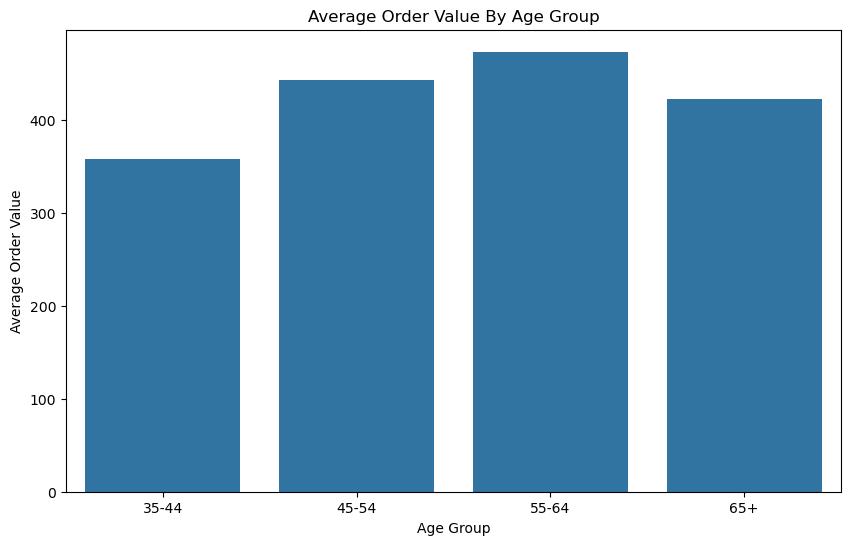

In [139]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Age_Group', y='avg_order_value', data = age_group_purchases)
plt.title('Average Order Value By Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Order Value')
plt.show()

In [ ]:
# Plot total sales by region

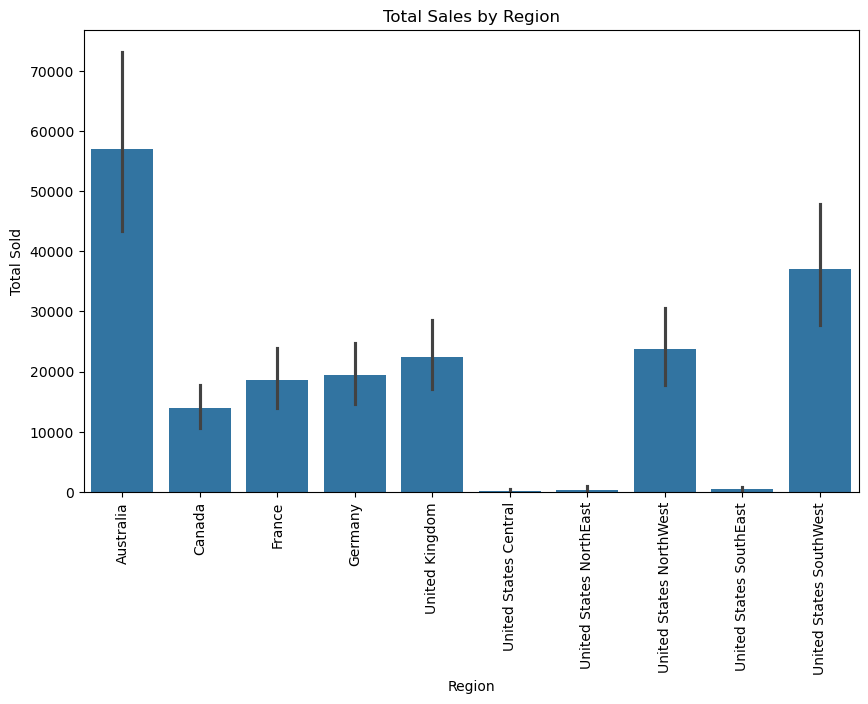

In [157]:
plt.figure(figsize = (10, 6))
sns.barplot(x='Region', y='total_sold', data=region_product_sales)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sold')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Group by income level to analyze purchasing power

In [161]:
income_purchase_power = merge_df.groupby('AnnualIncome').agg(
    total_spent  = ('OrderValue', 'sum'),
    avg_spend=('OrderValue', 'mean'),
    purchase_count= ('OrderValue', 'count')
).reset_index()

In [ ]:
# Plot the purchasing power by income level

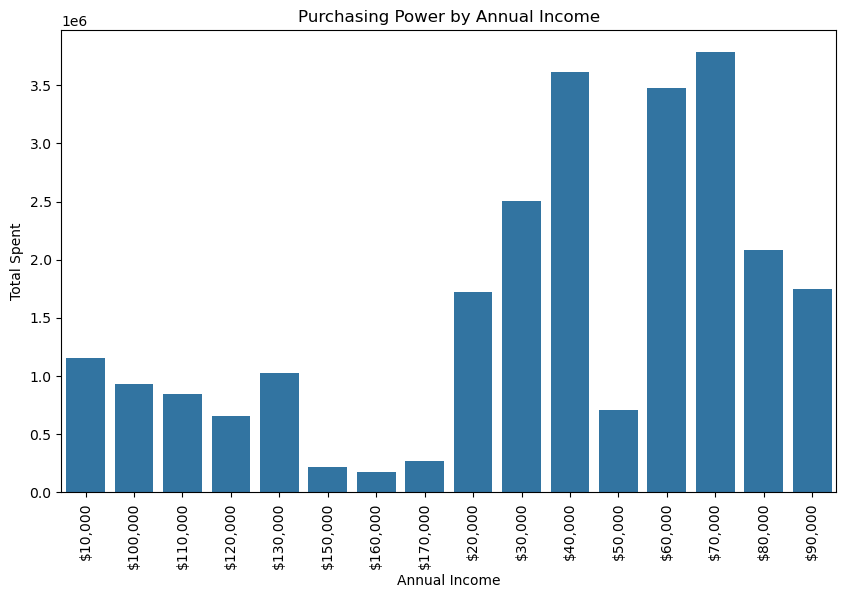

In [167]:
plt.figure(figsize = (10, 6))
sns.barplot(x='AnnualIncome', y='total_spent', data= income_purchase_power)
plt.title('Purchasing Power by Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Total Spent')
plt.xticks(rotation = 90)
plt.show()

In [169]:
conn.commit()

In [ ]:
# Close the connection

In [171]:
conn.close()

In [173]:
merge_df.head()

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,Region,ProductSubcategoryKey,...,ProductStyle,ProductCost,ProductPrice,Age_Group,Gender,AnnualIncome,Occupation,HomeOwner,TotalChildren,OrderValue
0,1/1/2015,9/21/2001,SO45080,332,14657,1,1,1,United States NorthWest,2,...,U,413.1463,699.0982,65+,M,"$80,000",Skilled Manual,N,1,699.0982
1,1/1/2015,12/5/2001,SO45079,312,29255,4,1,1,United States SouthWest,2,...,U,2171.2942,3578.2700,65+,M,"$80,000",Professional,N,3,3578.2700
2,1/1/2015,10/29/2001,SO45082,350,11455,9,1,1,Australia,1,...,U,1898.0944,3374.9900,45-54,M,"$100,000",Management,Y,0,3374.9900
3,1/1/2015,11/16/2001,SO45081,338,26782,6,1,1,Canada,2,...,U,413.1463,699.0982,35-44,M,"$30,000",Skilled Manual,N,0,699.0982
4,1/2/2015,12/15/2001,SO45083,312,14947,10,1,1,United Kingdom,2,...,U,2171.2942,3578.2700,55-64,M,"$20,000",Manual,Y,2,3578.2700


In [ ]:
# save result as csv file for future reference

In [177]:
merge_df.to_csv('Demographic table.csv', index= False)